# Analysing and Predicting Earning Potential of Adults

#### Income plays a significant role in determining a person's level of living and financial standing in society. It is crucial in deciding the nation's growth or "A huge income is the best prescription for happiness I ever heard of," Jane Austen reportedly said. It is crucial in deciding the nation's growth. Our goal is to find relevant insights that may be used to make better decisions. 

In [3]:
# Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization

import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset

income_data = pd.read_csv("/adult.csv")
income_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#income_data.head(3).to_csv("Character_data.csv")

In [ ]:
# Checking the shape(Number of records and attributes)
income_data.shape

(32561, 15)

In [ ]:
# Listing dataframe attributes
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
#replacing columns names having special characters with proper names 
income_data.rename(columns={'education.num':'EducationNum', 'capital.gain': 'CapitalGain', 'capital.loss': 'CapitalLoss', 'native.country': 'Country','hours.per.week': 'HoursPerWeek','marital.status': 'MaritalStatus'}, inplace=True)
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'EducationNum',
       'MaritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'Country', 'income'],
      dtype='object')

In [ ]:
#Listing datatypes of the attributes
income_data.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
EducationNum      int64
MaritalStatus    object
occupation       object
relationship     object
race             object
sex              object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
Country          object
income           object
dtype: object

In [ ]:
#data cleaning
#Finding the special characters count in the data frame 
income_data.isin(['?']).sum(axis=0)

age                 0
workclass        1836
fnlwgt              0
education           0
EducationNum        0
MaritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
Country           583
income              0
dtype: int64

In [ ]:
# replacing the special character to nan and then drop the columns 
income_data['Country'] = income_data['Country'].replace('?',np.nan)
income_data['workclass'] = income_data['workclass'].replace('?',np.nan)
income_data['occupation'] = income_data['occupation'].replace('?',np.nan)


In [ ]:
# viewing data again 
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Printing top 10 records
income_data.head(10)

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [ ]:
#income_data.head().to_excel("head_income_data.xls")

In [ ]:
# income dataset info to find columns and count of the data 
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      30725 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   EducationNum   32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   occupation     30718 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HoursPerWeek   32561 non-null  int64 
 13  Country        31978 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Renaming sex column to Gender
income_data.rename(columns = {'sex':'gender'}, inplace=True)

In [ ]:
# counting the duplicate rows in the dataset 
income_data.duplicated().sum()

24

In [ ]:
# removing duplicate values from the dataset
income_data.drop_duplicates(inplace = True)

In [ ]:
income_data.shape

(32537, 15)

In [ ]:
# Counting total number of null values in the entire dataset
income_data.isnull().sum().sum()

4261

In [ ]:
#Counting number of NA values for all attributes
income_data.isnull()
income_data.isnull().sum()
income_data.isnull().sum().sort_values(ascending=False)

occupation       1843
workclass        1836
Country           582
age                 0
fnlwgt              0
education           0
EducationNum        0
MaritalStatus       0
relationship        0
race                0
gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
income              0
dtype: int64

In [ ]:
# Filling NA's with mode[0] as only categorical variables have null values

for col in ['occupation','workclass', 'Country']:
    income_data[col].fillna(income_data[col].mode()[0], inplace=True)
    

In [ ]:
# Again checking the nulls

income_data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
MaritalStatus    0
occupation       0
relationship     0
race             0
gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
Country          0
income           0
dtype: int64

In [ ]:
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Descriptive Analytics of quantitative variables in the dataframe

Numeric_data = round(income_data.describe(),0)  # rounding off the decimals
Numeric_data # transposing the data

#Numeric_data.T.to_csv("Numeric_data.csv")

,age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0
mean,39.0,189781.0,10.0,1078.0,87.0,40.0
std,14.0,105556.0,3.0,7388.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,236993.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [ ]:
#Checking unique values for all Categorical columns(workclass,education,MaritalStatus,occupation,
#relationship,race,gender,Country,income )

print("workclass:", income_data.workclass.unique())
print("education:", income_data.education.unique())
print("MaritalStatus :", income_data.MaritalStatus.unique())
print("occupation :", income_data.occupation.unique())
print("relationship :", income_data.relationship.unique())
print("race :", income_data.race.unique())
print("gender :", income_data.gender.unique())
print("Country :", income_data.Country.unique())
print("income :", income_data.income.unique())

workclass: ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
MaritalStatus : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation : ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
relationship : ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender : ['Female' 'Male']
Country : ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Can

In [ ]:
# Counting the occurence of values for workclass
income_data["workclass"].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Counting the occurence of values for education
income_data["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [ ]:
# Counting the occurence of values for MaritalStatus
income_data["MaritalStatus"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: MaritalStatus, dtype: int64

In [ ]:
# Counting the occurence of values for occupation
income_data["occupation"].value_counts()

Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# Counting the occurence of values for relationship
income_data["relationship"].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
# Counting the occurence of values for race
income_data["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
# Counting the occurence of values for gender
income_data["gender"].value_counts()

Male      21775
Female    10762
Name: gender, dtype: int64

In [ ]:
# Counting the occurence of values for Country
income_data["Country"].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
# Counting the occurence of values for income
income_data["income"].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [ ]:
income_data.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
EducationNum      int64
MaritalStatus    object
occupation       object
relationship     object
race             object
gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
Country          object
income           object
dtype: object

In [ ]:
#converting the object datatypes to categorical data types 
income_data["workclass"]=income_data["workclass"].astype("category")
income_data["education"]=income_data["education"].astype("category")
income_data["MaritalStatus"]= income_data["MaritalStatus"].astype("category")
income_data["occupation"]= income_data["occupation"].astype("category")
income_data["relationship"]= income_data["relationship"].astype("category")
income_data["race"]= income_data["race"].astype("category")
income_data["gender"]= income_data["gender"].astype("category")
income_data["Country"]= income_data["Country"].astype("category")
income_data["income"]= income_data["income"].astype("category")

In [ ]:
income_data.dtypes

age                 int64
workclass        category
fnlwgt              int64
education        category
EducationNum        int64
MaritalStatus    category
occupation       category
relationship     category
race             category
gender           category
CapitalGain         int64
CapitalLoss         int64
HoursPerWeek        int64
Country          category
income           category
dtype: object

# Data Visualization

###  Categorical variables

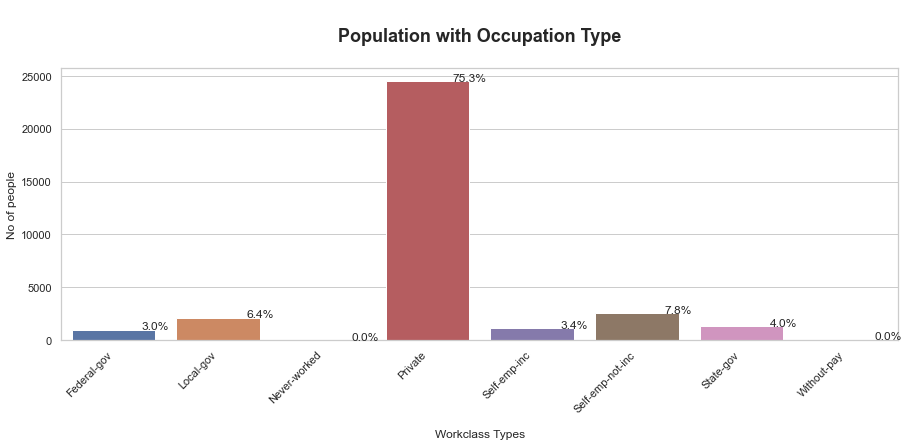

In [ ]:
#Creating countplot for workclass
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('\nPopulation with Occupation Type\n', fontsize=18, fontweight='bold')

total = float(len(income_data))
ax = sns.countplot(x = 'workclass', data = income_data)

plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

The countplot shows that Private Occupation have the maximum number of the people.

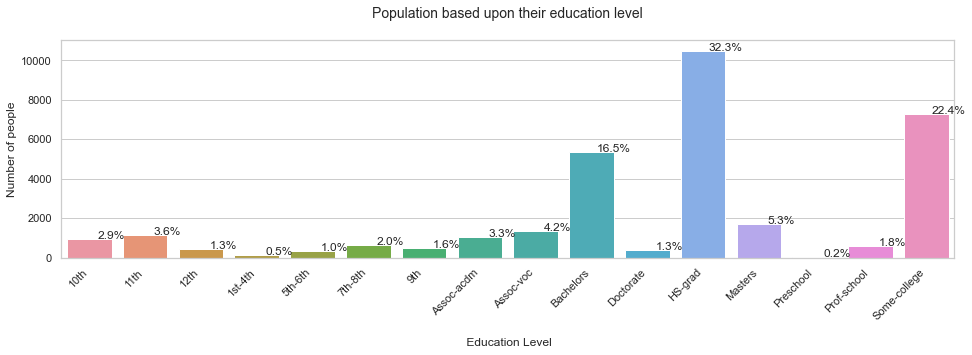

In [ ]:
#Representing number of people with different education level

plt.figure(figsize=(16,4))
sns.set(style = 'whitegrid')

ax = sns.countplot(x = 'education', data = income_data)
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel(" \n Education Level")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


for p in (ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#plt.savefig("bar chart of education and population.png")
plt.show()


The bargraph illustrates that the majority participants in the dataset are High School Graduates, followed by some college, then Bachelors degree holders.

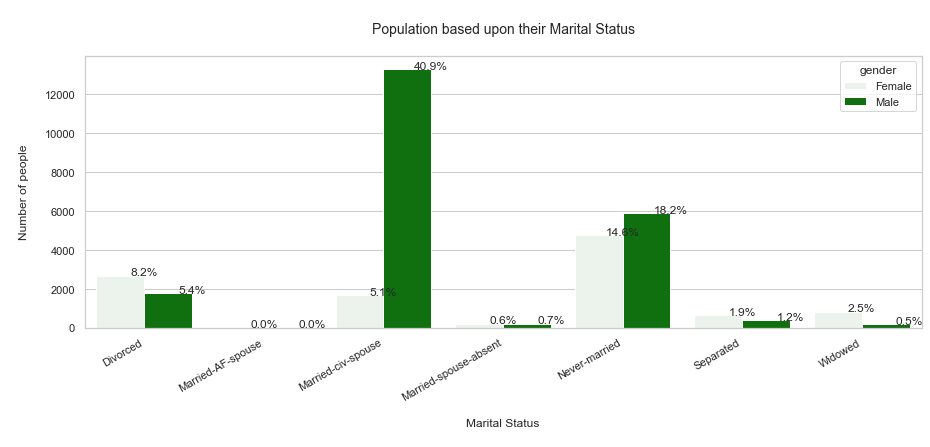

In [ ]:
#Graph representing marital_status of people in the dataset:

plt.figure(figsize=(15,5))
ax = sns.countplot("MaritalStatus",data=income_data,hue="gender",color="green")

plt.title("\nPopulation based upon their Marital Status\n",size=14)
plt.ylabel("\nNumber of people\n")
plt.xlabel(" \nMarital Status\n")

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


for p in (ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#plt.savefig("bar chart of Marital Status and population.png")
plt.show()

The majority of working males are married, followed by singles. However, the majority of working females are single, followed by divorced and married women.

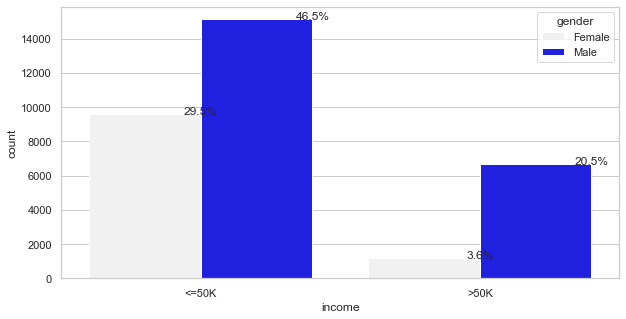

In [ ]:
#Graph representing number of people based upon income:

plt.figure(figsize=(10,5))
ax = sns.countplot("income",data=income_data,hue="gender",color="blue")

for p in (ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#plt.savefig("bar chart of income and gender count.png")
plt.show()

As demonstrated in the graph above, the majority of people earn less than or equal to $50,000.

In [ ]:
#Using the map function, convert the data type of income variable to numerical data 

income_data['income'] = income_data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

<AxesSubplot:xlabel='education'>

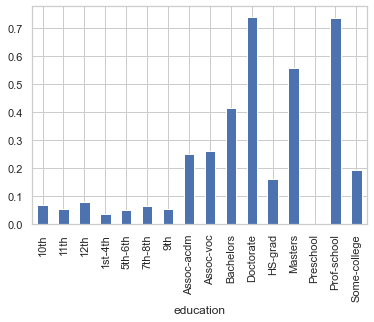

In [ ]:
#Creating a bar graph for Education vs. Income to illustrate how these two columns are related 
income_data.groupby('education').income.mean().plot(kind='bar')
# plt.savefig("bar chart of income and education.png")

Adults with a Prof-school and Doctorate educational background will have a greater salary, and it is likely that they will earn more over $50,000.

<AxesSubplot:xlabel='occupation'>

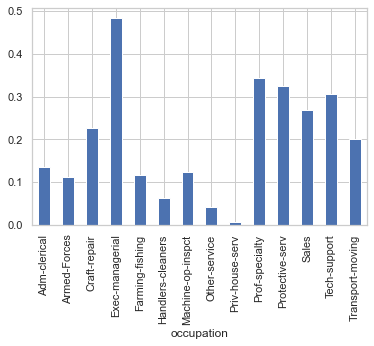

In [ ]:
#To demonstrate the relationship between these columns, make a bar graph of Occupation vs. Income. 
income_data.groupby('occupation').income.mean().plot(kind='bar')

According to our statistics, people with the jobs Prof-specialty and Exec-managerial have a better chance of earning more than $50,000.

<AxesSubplot:xlabel='gender'>

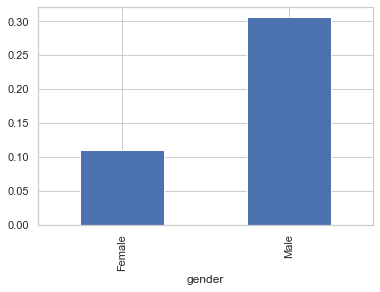

In [ ]:
#To demonstrate the relationship between these columns, make a bar graph of gender vs. Income.
income_data.groupby('gender').income.mean().plot(kind='bar')

The gender bar chart shows that men are more likely to have a greater salary than women.

<AxesSubplot:xlabel='relationship'>

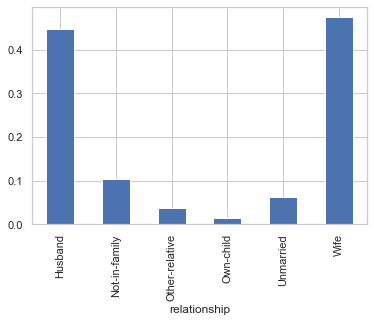

In [ ]:
#Creating a bar graph for relationship vs. Income to illustrate how these two columns are related 
income_data.groupby('relationship').income.mean().plot(kind='bar')

We can see from the relationship chart that the wife and husband have a larger income. A married pair would very certainly earn more than $50,000.

<AxesSubplot:xlabel='race'>

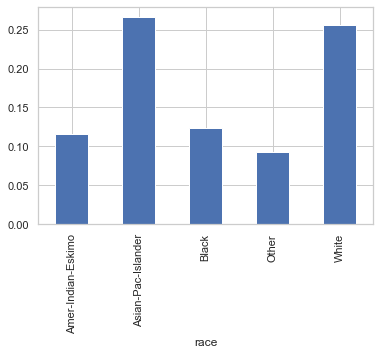

In [ ]:
#Creating a bar graph for race vs. Income to illustrate how these two columns are related 
income_data.groupby('race').income.mean().plot(kind='bar')

According to the data, an Asian-Pacific Islander or a white person had a better probability of earning more than $50,000.

<AxesSubplot:xlabel='workclass'>

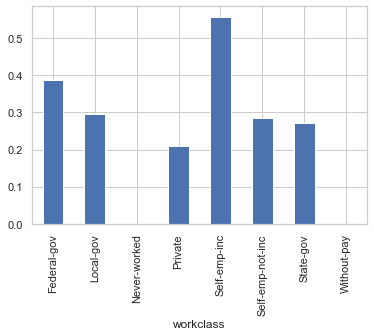

In [ ]:
#Creating a bar graph for workclass vs. Income to illustrate how these two columns are related 
income_data.groupby('workclass').income.mean().plot(kind='bar')

Self-employees in Federal government workclasses have a better probability of earning more than $50,000.

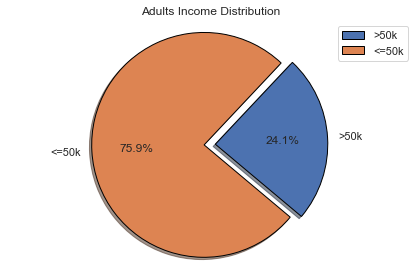

In [ ]:
# plotting pie chart for percentage of incomes of adults

countG50k = income_data.income[income_data['income']==1].count()
countL50k = income_data.income[income_data['income']==0].count()

labels = ['>50k', '<=50k']
slices = [countG50k, countL50k]
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
       startangle = -40, autopct='%1.1f%%',
       wedgeprops ={'edgecolor' : 'black'})
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Adults Income Distribution")
plt.legend()
plt.tight_layout() # Used for padding
plt.savefig('Adults Income distribution.jpg')
plt.show()

### Visualisation of Numerical Attributes

Text(0.5, 1.0, 'Age Histogram')

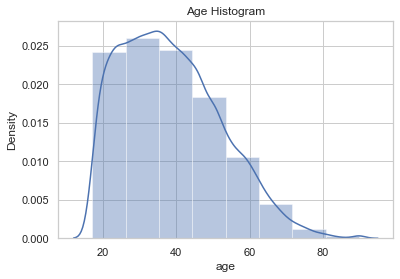

In [ ]:
#Histogram representing age
sns.distplot(income_data['age'],bins=8)
plt.title("Age Histogram")

We can see from the above histogram that the majority of the people are between the ages of 20 and 40, with the age group beyond 80 having the least number of people.

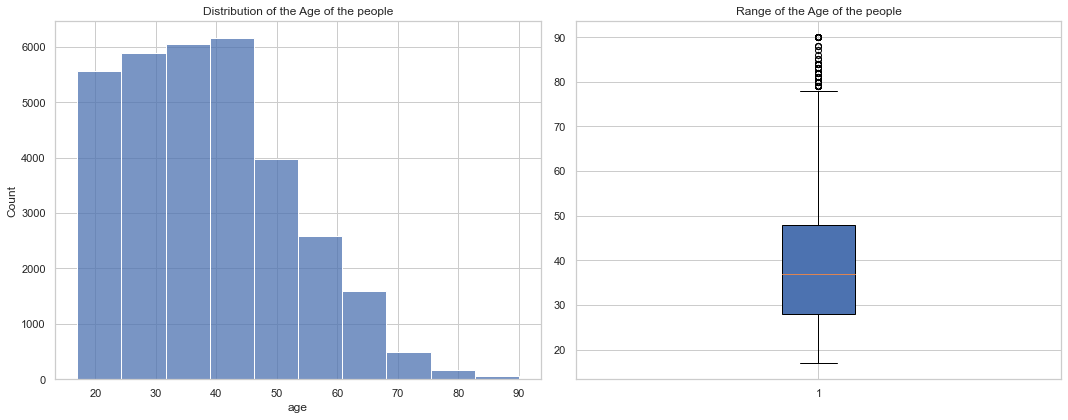

In [ ]:
# Histogram and Boxplot for Age 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['age'],bins=10,ax=axes[0])
plt.boxplot(income_data['age'], patch_artist = True)

axes[0].set_title('Distribution of the Age of the people')
axes[1].set_title('Range of the Age of the people')
plt.tight_layout()
#plt.savefig("Figure3.png")
plt.show()

In [ ]:
income_data.describe()

,age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Detect Outliers Based on Age Attribute

In [ ]:
# Calculating Q1 and Q3 for age attribute

Q1 = income_data.age.quantile(0.25)
Q3 = income_data.age.quantile(0.75)
Q1, Q3

(28.0, 48.0)

In [ ]:
# Calculating interquartile range for age attribute
IQR = Q3-Q1 
IQR

20.0

In [ ]:
#Calculate lower limit for age attribute
lower_limit = Q1 - 1.5*IQR

#Calculate upper limit for age attribute
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(-2.0, 78.0)

In [ ]:
income_data.age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
# removing the outlier
index = income_data.loc[~(income_data.age>upper_limit),"age"].index
index

Int64Index([    2,     3,     4,     5,     6,     7,     8,     9,    10,
               11,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=32395)

In [ ]:
income_data = income_data.loc[index]
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
income_data.shape

(32395, 15)

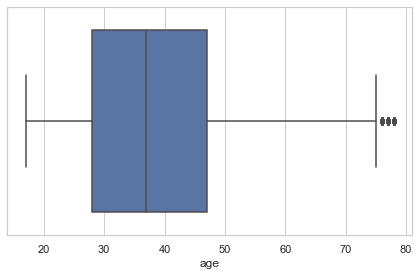

In [ ]:
# Visualizing distribution  of 'age' attribute
sns.boxplot(x = 'age', data = income_data)
plt.tight_layout()
plt.show()

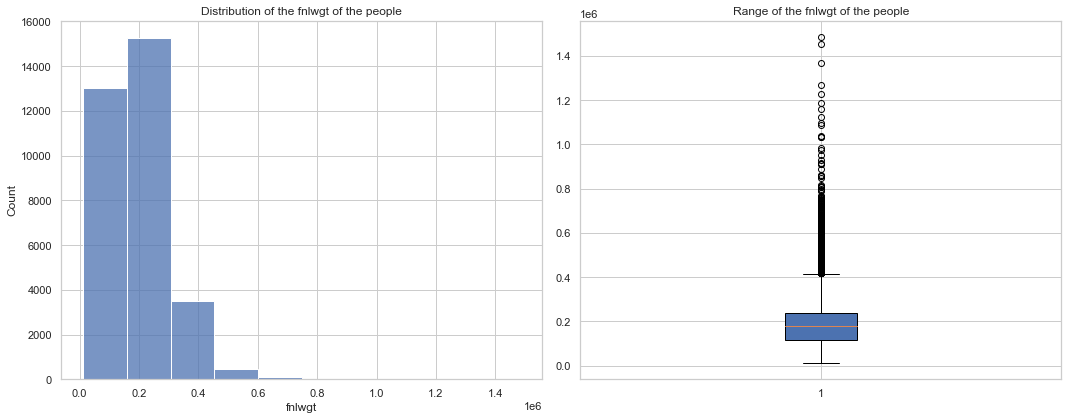

In [ ]:
# Histogram and Boxplot for fnlwgt 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['fnlwgt'],bins=10,ax=axes[0])
plt.boxplot(income_data['fnlwgt'], patch_artist = True)

axes[0].set_title('Distribution of the fnlwgt of the people')
axes[1].set_title('Range of the fnlwgt of the people')
plt.tight_layout()
#plt.savefig("Figure4.png")
plt.show()

Detect Outliers based on fnlwgt attribute

In [ ]:
# Calculating Q1 and Q3 for fnlwgt attribute
Q1 = income_data.fnlwgt.quantile(0.25)
Q3 = income_data.fnlwgt.quantile(0.75)
Q1, Q3


(117849.0, 237282.5)

In [ ]:
# Calculating Interquartile range for fnlwgt attribute
IQR = Q3-Q1
IQR

119433.5

In [ ]:
# calculating lower and upper limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-61301.25, 416432.75)

In [ ]:
income_data.fnlwgt.describe()

count    3.239500e+04
mean     1.899060e+05
std      1.056092e+05
min      1.228500e+04
25%      1.178490e+05
50%      1.785060e+05
75%      2.372825e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [ ]:
# Removing the outliers from fnlwgt attribute
index1 = income_data.loc[~((income_data.fnlwgt<lower_limit)| (income_data.fnlwgt>upper_limit)),"fnlwgt"].index
index1

Int64Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,
               12,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=31414)

In [ ]:
income_data = income_data.loc[index1]
income_data.shape

(31414, 15)

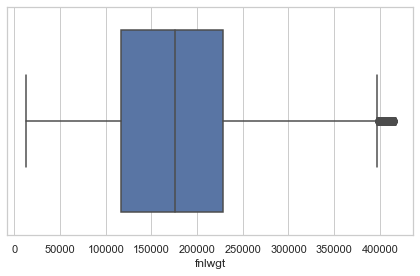

In [ ]:
sns.boxplot(x = 'fnlwgt', data = income_data)
plt.tight_layout()
plt.show()

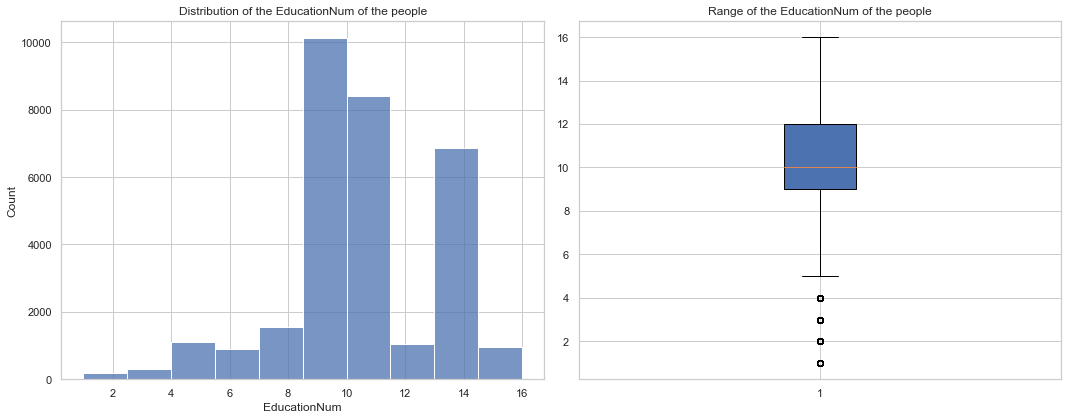

In [ ]:
# Histogram and Boxplot for EducationNum 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['EducationNum'],bins=10,ax=axes[0])
plt.boxplot(income_data['EducationNum'], patch_artist = True)

axes[0].set_title('Distribution of the EducationNum of the people')
axes[1].set_title('Range of the EducationNum of the people')
plt.tight_layout()
#plt.savefig("hist of EducationNum.png")
plt.show()

Detect Outliers based on EducationNum attribute

In [ ]:
# Calculating Q1 and Q3 for EducationNum attribute
Q1 = income_data.EducationNum.quantile(0.25)
Q3 = income_data.EducationNum.quantile(0.75)
Q1, Q3

(9.0, 12.0)

In [ ]:
# Calculating interquartile range for EducationNum attribute
IQR = Q3-Q1
IQR

3.0

In [ ]:
# calculating lower and upper limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(4.5, 16.5)

In [ ]:
income_data.EducationNum.describe()

count    31414.000000
mean        10.097600
std          2.557403
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: EducationNum, dtype: float64

In [ ]:
# Removing the outliers from EducationNum attribute
index1= income_data.loc[~((income_data.EducationNum<lower_limit)| (income_data.EducationNum>upper_limit)),"EducationNum"].index
index1

Int64Index([    2,     4,     5,     6,     7,     9,    10,    11,    12,
               13,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=30303)

In [ ]:
income_data = income_data.loc[index1]
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
income_data.shape

(30303, 15)

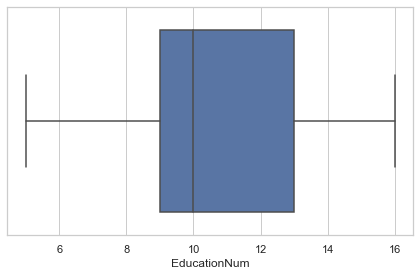

In [ ]:
sns.boxplot(x = 'EducationNum', data = income_data)
plt.tight_layout()
plt.show()

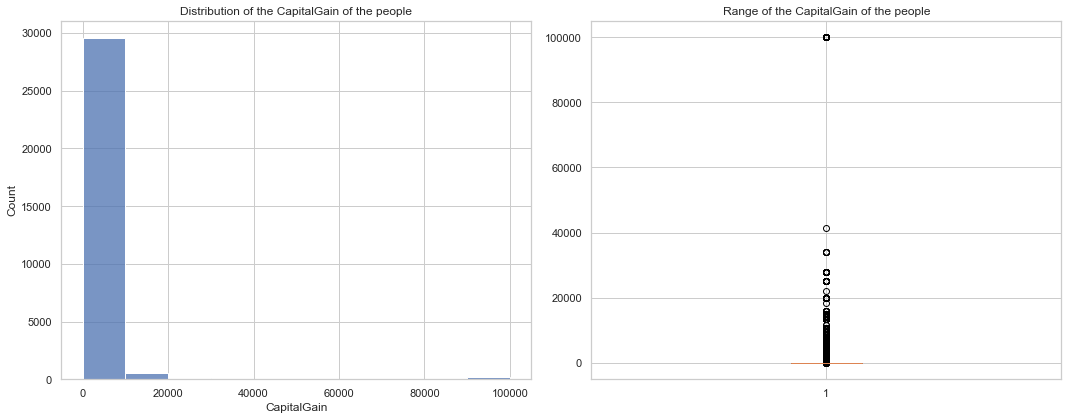

In [ ]:
# Histogram and Boxplot for CapitalGain 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['CapitalGain'],bins=10,ax=axes[0])
plt.boxplot(income_data['CapitalGain'], patch_artist = True)

axes[0].set_title('Distribution of the CapitalGain of the people')
axes[1].set_title('Range of the CapitalGain of the people')
plt.tight_layout()
#plt.savefig("hist of CapitalGain.png")
plt.show()

Detect Outliers based on CapitalGain attribute

In [ ]:
# Calculating Q1 and Q3 for CapitalGain attribute 
Q1 = income_data.CapitalGain.quantile(0.25)
Q3 = income_data.CapitalGain.quantile(0.75)
Q1, Q3

# Calculating IQR for CapitalGain attribute
IQR = Q3-Q1
IQR

# Calculating lower and upper limit for CapitalGain attribute
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


# Removing the outliers from CapitalGain attribute
income_data = income_data[~((income_data.CapitalGain<lower_limit)| (income_data.CapitalGain>upper_limit))]

income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


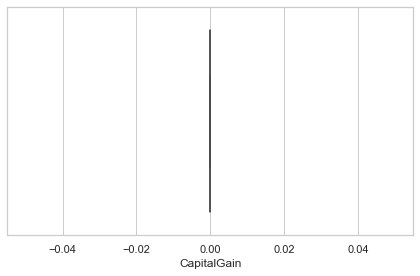

In [ ]:
sns.boxplot(x = 'CapitalGain', data = income_data)
plt.tight_layout()
plt.show()

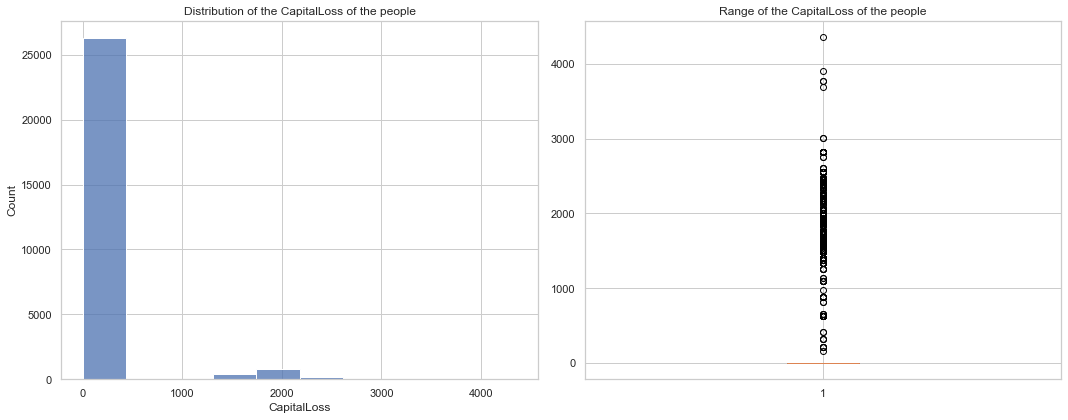

In [ ]:
# Histogram and Boxplot for CapitalLoss 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['CapitalLoss'],bins=10,ax=axes[0])
plt.boxplot(income_data['CapitalLoss'], patch_artist = True)

axes[0].set_title('Distribution of the CapitalLoss of the people')
axes[1].set_title('Range of the CapitalLoss of the people')
plt.tight_layout()
#plt.savefig("hist of CapitalLoss.png")
plt.show()

Detect Outliers based on CapitalLoss attribute

In [ ]:
# Calculating Q1 and Q3 for CapitalLoss attribute
Q1 = income_data.CapitalLoss.quantile(0.25)
Q3 = income_data.CapitalLoss.quantile(0.75)
Q1, Q3

# Calculating IQR for CapitalLoss attribute
IQR = Q3-Q1
IQR

# Calculating lower and upper limit for CapitalLoss attribute
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


# Removing the outliers from CapitalLoss attribute
income_data = income_data[~((income_data.CapitalLoss<lower_limit)| (income_data.CapitalLoss>upper_limit))]
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
4231,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


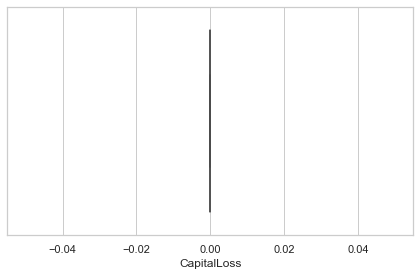

In [ ]:
sns.boxplot(x = 'CapitalLoss', data = income_data)
plt.tight_layout()
plt.show()

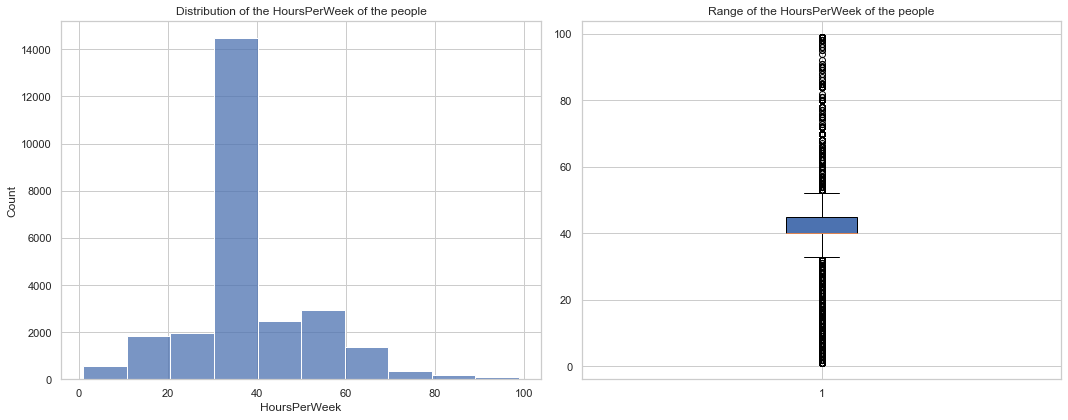

In [ ]:
# Histogram and Boxplot for HoursPerWeek 

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.histplot(income_data['HoursPerWeek'],bins=10,ax=axes[0])
plt.boxplot(income_data['HoursPerWeek'], patch_artist = True)

axes[0].set_title('Distribution of the HoursPerWeek of the people')
axes[1].set_title('Range of the HoursPerWeek of the people')
plt.tight_layout()
#plt.savefig("hist of HoursPerWeek.png")
plt.show()

Detect Outliers based on HoursPerWeek  attribute

In [ ]:
# Calculating Q1 and Q3 for HoursPerWeek attribute
Q1 = income_data.HoursPerWeek.quantile(0.25)
Q3 = income_data.HoursPerWeek.quantile(0.75)
Q1, Q3

# Calculating IQR for HoursPerWeek attribute
IQR = Q3-Q1
IQR

# Calculating lower and upper limit for HoursPerWeek attribute
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(32.5, 52.5)

In [ ]:
income_data.HoursPerWeek.describe()

count    26300.00000
mean        40.12384
std         12.26543
min          1.00000
25%         40.00000
50%         40.00000
75%         45.00000
max         99.00000
Name: HoursPerWeek, dtype: float64

In [ ]:
# Removing the outliers from HoursPerWeek attribute
income_data = income_data[~((income_data.HoursPerWeek<lower_limit)| (income_data.HoursPerWeek>upper_limit))]
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,CapitalGain,CapitalLoss,HoursPerWeek,Country,income
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


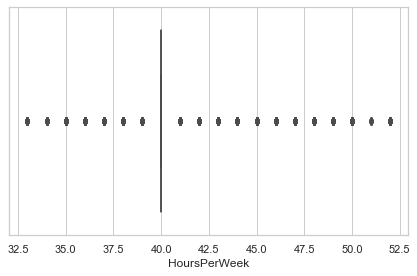

In [ ]:
sns.boxplot(x = 'HoursPerWeek', data = income_data)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box plot representing age and income \n')

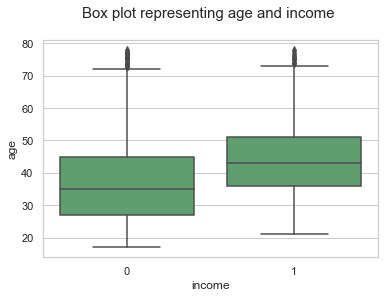

In [ ]:
#Variation between age and income level
sns.boxplot(x=income_data['income'],y = income_data['age'],color='g')
plt.title("Box plot representing age and income \n", size = 15)
#plt.savefig("Box plot representing age and income.png")

In [ ]:
# checking the variance of the variables

variance=round(income_data.var(),0)
#variance.to_csv("variance.csv")

I delete attributes with nearly zero variance from the data set because they don't provide any information about the dataset..

In [ ]:
income_data = income_data.drop(["CapitalGain","CapitalLoss"],axis = 1)

In [ ]:
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,HoursPerWeek,Country,income
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1


In [ ]:
# printing the numerical and categorical variables individually

numeric = []
category = []
for col in income_data:
    if pd.api.types.is_numeric_dtype(income_data[col]):
        numeric.append(col)
    else:
        category.append(col)
print("category:", category)
print("numeric:", numeric)

category: ['workclass', 'education', 'MaritalStatus', 'occupation', 'relationship', 'race', 'gender', 'Country']
numeric: ['age', 'fnlwgt', 'EducationNum', 'HoursPerWeek', 'income']


### Correlation Matrix using Pearson Method

In [ ]:
corr= income_data.corr().round(2)
corr

,age,fnlwgt,EducationNum,HoursPerWeek,income
age,1.00,-0.07,0.05,0.05,0.25
fnlwgt,-0.07,1.00,-0.03,-0.02,0.00
EducationNum,0.05,-0.03,1.00,0.13,0.30
HoursPerWeek,0.05,-0.02,0.13,1.00,0.17
income,0.25,0.00,0.30,0.17,1.00


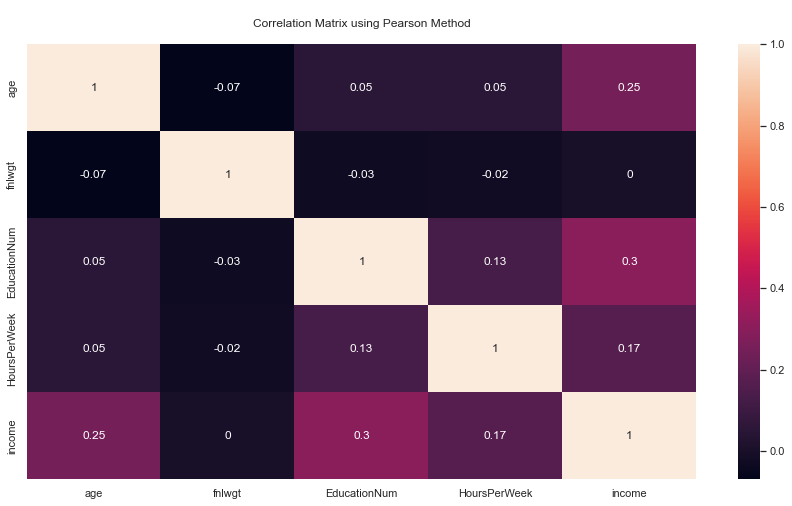

In [ ]:
# plotting the correlation matrix
plt.figure(figsize=(15,8))
correlation_mat = income_data.corr().round(2)

sns.heatmap(correlation_mat, annot = True)
plt.title("\nCorrelation Matrix using Pearson Method\n")
#plt.savefig("corr.png",bbox_inches='tight')
plt.show()

### Spearman Correlation

In [ ]:
corr1 = income_data.corr(method='spearman').round(2)
corr1

,age,fnlwgt,EducationNum,HoursPerWeek,income
age,1.00,-0.07,0.05,0.06,0.27
fnlwgt,-0.07,1.00,-0.02,-0.02,-0.00
EducationNum,0.05,-0.02,1.00,0.12,0.28
HoursPerWeek,0.06,-0.02,0.12,1.00,0.17
income,0.27,-0.00,0.28,0.17,1.00


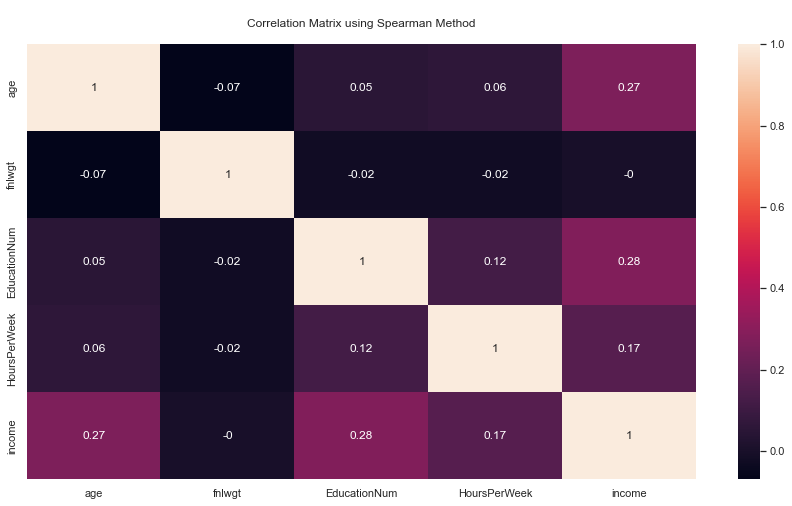

In [ ]:
# plotting the correlation matrix
plt.figure(figsize=(15,8))
correlation_mat = income_data.corr(method='spearman').round(2)

sns.heatmap(correlation_mat, annot = True)
plt.title("\nCorrelation Matrix using Spearman Method\n")
#plt.savefig("corr2.png",bbox_inches='tight')
plt.show()

The above graphs show the relation between two variables using two different methods and shows how the change in one variable impact other. The value varies between -1 to 1. No strong correlation has been observed between any of the variables.

In [ ]:
# choosing only numerical attributes from whole dataset
income_data.columns[~income_data.columns.isin(category)]

Index(['age', 'fnlwgt', 'EducationNum', 'HoursPerWeek', 'income'], dtype='object')

In [ ]:
# Choosing features for our model
income_new_data= income_data[income_data.columns[~income_data.columns.isin(category)]]
income_new_data

,age,fnlwgt,EducationNum,HoursPerWeek,income
4232,38,215646,9,40,0
4233,53,234721,7,40,0
4234,28,338409,13,40,0
4235,37,284582,14,40,0
4237,52,209642,9,45,1
...,...,...,...,...,...
32555,53,321865,14,40,1
32556,22,310152,10,40,0
32557,27,257302,12,38,0
32558,40,154374,9,40,1


In [ ]:
income_new_data.dtypes

age             int64
fnlwgt          int64
EducationNum    int64
HoursPerWeek    int64
income          int32
dtype: object

### Which attributes appear to be the most closely associated with the target attribute('income')?

In [ ]:
income1= income_new_data.corr()['income'].abs().sort_values(ascending=False)
income1
#income1.to_csv("corr_target.csv",index=True)

income          1.000000
EducationNum    0.295074
age             0.245649
HoursPerWeek    0.172764
fnlwgt          0.000373
Name: income, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(corr1["income"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

income    1.0
Name: income, dtype: float64

It shows none of the above numerical attributes are closely correlated with the target variable as the correlation of any attribute is not more than 0.5

In [ ]:
income_new_data.shape

(18991, 5)

### Data Preprocessing

#### We Choose only numerical attributes for Modelling i.e; age, fnlwgt, EducationNum, HoursPerWeek, income

#### First we will normalize our attributes into 0 to 1 range.

####  Normalization refers to rescaling of real-valued numeric attributes into a 0 to 1 range.

### Separating the independent variables from dependent variables

In [ ]:
x = income_new_data.iloc[:,:-1] # independent
y= income_new_data.iloc[:,-1] # target

In [ ]:
x.head(3)

,age,fnlwgt,EducationNum,HoursPerWeek
4232,38,215646,9,40
4233,53,234721,7,40
4234,28,338409,13,40


In [ ]:
y.head(3)

4232    0
4233    0
4234    0
Name: income, dtype: int32

In [ ]:
income_new_data 

,age,fnlwgt,EducationNum,HoursPerWeek,income
4232,38,215646,9,40,0
4233,53,234721,7,40,0
4234,28,338409,13,40,0
4235,37,284582,14,40,0
4237,52,209642,9,45,1
...,...,...,...,...,...
32555,53,321865,14,40,1
32556,22,310152,10,40,0
32557,27,257302,12,38,0
32558,40,154374,9,40,1


# Train and Test Split Approach:

### In this method, the entire data set is randomly partitioned into training and test sets. I divided the information into two parts(training and test sets). The Training set contains 70% of the records in the data set, whereas the Test set contains 30% of the data set's observations.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input,test_input, train_output,test_output = train_test_split(x,y, test_size = 0.3, random_state=4)

In [ ]:
train_input

,age,fnlwgt,EducationNum,HoursPerWeek
20086,35,27408,10,40
17286,35,243409,10,40
11154,23,219835,10,40
29285,39,126161,16,45
10970,69,107548,5,40
...,...,...,...,...
29292,41,168324,10,40
21863,28,31717,9,45
29667,27,183523,13,45
16705,43,182757,9,40


In [ ]:
x.shape[0]

18991

In [ ]:
train_input.shape

(13293, 4)

In [ ]:
test_input.shape

(5698, 4)

In [ ]:
test_output.shape

(5698,)

In [ ]:
train_output.shape

(13293,)

#### Summarize class distribution
#### SMOTE (synthetic minority oversampling technique) 
#### It is one of the most widely used oversampling approaches to overcome the imbalance problem . Its goal is to achieve a more balanced distribution of classes by replicating minority class examples at random.

In [ ]:
print("Before SMOTE")
train_output.value_counts()

Before SMOTE


0    10486
1     2807
Name: income, dtype: int64

#### Imbalanced-Learn is a Python tool for balancing datasets in equal ratios

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(sampling_strategy='minority', random_state=10)

In [ ]:
train_input_SMOTE, train_output_SMOTE= SMOTE.fit_resample(train_input, train_output)
train_input_SMOTE.head(3)

,age,fnlwgt,EducationNum,HoursPerWeek
0,35,27408,10,40
1,35,243409,10,40
2,23,219835,10,40


In [ ]:
print("after SMOTE:")
train_output_SMOTE.value_counts()

after SMOTE:


0    10486
1    10486
Name: income, dtype: int64

In [ ]:
train_input_SMOTE.duplicated().sum()

301

## Now, I check my model for categorical as well as numerical data

In [ ]:
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'EducationNum',
       'MaritalStatus', 'occupation', 'relationship', 'race', 'gender',
       'HoursPerWeek', 'Country', 'income'],
      dtype='object')

In [ ]:
income_data

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,gender,HoursPerWeek,Country,income
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
